<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Esteban Marquez Delgado y Juan Pablo Ruiz Magaña.

**Fecha:** 17 de febrero del 2020.
    
**Expediente** : 700637. 
    
**Expediente** : 721093.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link del repositorio:** https://github.com/JuanPablo2019/Tarea4_SPF.git

# Tarea 4: Clase 7

# 1 Ejercicio
Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

In [ ]:
# Código de solución 
.
.
.
.
#(0.127, 0.01352, 1e-05)

# 2 Ejercicio de aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [3]:
################## Datos del problema
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80


### `Respuestas Juan Pablo`

### `Ejercicio 1`

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
%matplotlib inline

### 1. Defino la función

In [2]:
def juego(N):
    x = np.zeros((N,3))
    def hist(i):
        nonlocal x
        x[i]=[np.random.randint(1,7,size=1,dtype=int),st.binom(n=5, p=0.5).rvs(size=1),st.binom(n=5, p=0.2).rvs(size=1)]
        
    [hist(i) for i in range(N)]
    return x

### 2. Realizo 100,000 simulaciones

In [39]:
N = 100000
matrix=juego(N)

### 3. Obtengo la suma de los dados

In [40]:
df=pd.DataFrame(matrix)
suma=df.sum(axis=1)
suma

0        8.0
1        4.0
2        9.0
3        5.0
4        6.0
        ... 
99995    4.0
99996    8.0
99997    5.0
99998    5.0
99999    3.0
Length: 100000, dtype: float64

### 4. Encuentro las probabilidades

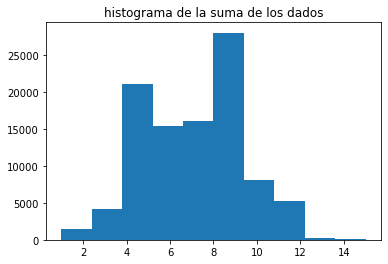

In [41]:
plt.hist(suma)
plt.title('histograma de la suma de los dados')
plt.show()

In [42]:
c = Counter(suma)
print('la probabilidad de obtener 7 es:',c[7]/N,'la probabilidad de obtener 14 es:',c[14]/N,'la probabilidad de obtener 18 es:',c[18]/N)

la probabilidad de obtener 7 es: 0.16101 la probabilidad de obtener 14 es: 0.0005 la probabilidad de obtener 18 es: 0.0


### `Ejercicio 2`

### 1. Se crean los datos diarios en el intervalo de tiempo dado a partir de las siguientes funciones

In [23]:
################## Datos del problema
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80


In [24]:
# asignación de clientes
def clientes(size=1):
    cl = np.random.randint(0,2,size=size)
    return int(cl)

In [25]:
# tiempo en ser atendido
def atendido(size=1):
    a= clientes()
    if a == 1:
        return [a,float(np.random.uniform(60,300,size=size))]
    elif a == 0:
        return [a,float(np.random.uniform(40,120,size=size))]

In [26]:
# consumo de los clientes
def consumo(size=1):
    d= atendido()
    if d[0]==0:
        return float(np.random.uniform(30,100))
    elif d[0]==1:
        return float(np.random.uniform(20,80))

In [27]:
def datos(N):
    x = np.zeros((N,3))
    def generador(i):
        nonlocal x
        x[i]=np.array([clientes(),atendido()[1],consumo()])
        
    [generador(i) for i in range(N)]
    return x

In [28]:
def time_acum(x):
    y = np.zeros(len(x))
    y[0]=x[0]
    def suma(i):
        y[i]=x[0:i+1].sum()
    [suma(i) for i in range(1,len(x))]
    return y

### 2. Generación de datos

#### Genero 500 datos para 5 días

In [29]:
N = 500
data=[datos(N)for i in range(5)]
d1=pd.DataFrame(data[0], columns=['sex','time','purchase'])
d2=pd.DataFrame(data[1], columns=['sex','time','purchase'])
d3=pd.DataFrame(data[2], columns=['sex','time','purchase'])
d4=pd.DataFrame(data[3], columns=['sex','time','purchase'])
d5=pd.DataFrame(data[4], columns=['sex','time','purchase'])

#### Calculo el tiempo acumulado

In [30]:


d1['time_acum']=time_acum(d1['time'])
d2['time_acum']=time_acum(d2['time'])
d3['time_acum']=time_acum(d3['time'])
d4['time_acum']=time_acum(d4['time'])
d5['time_acum']=time_acum(d5['time'])

#### Detecto en que indcie se pasa el intervalo de tiempo

In [31]:


f1=([d1[d1['time_acum'] > T].index])[0][0]
f2=([d2[d2['time_acum'] > T].index])[0][0]
f3=([d3[d3['time_acum'] > T].index])[0][0]
f4=([d4[d4['time_acum'] > T].index])[0][0]
f5=([d5[d5['time_acum'] > T].index])[0][0]
f1,f2,f3,f4,f5

(186, 188, 195, 182, 192)

#### Recorto los datos hasta el punto en el que esten dentro del intervalo de tiempo

In [32]:

d1 = d1[0:f1]
d2 = d1[0:f2]
d3 = d1[0:f3]
d4 = d1[0:f4]
d5 = d1[0:f5]

### 7. Respuestas a las preguntas del ejercicio

In [33]:
#1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
consumo_m=d1[d1['sex']==1]['purchase'].sum()+d2[d2['sex']==1]['purchase'].sum()+d3[d3['sex']==1]['purchase'].sum()+d4[d4['sex']==1]['purchase'].sum()+d5[d5['sex']==1]['purchase'].sum()
consumo_h=d1[d1['sex']==0]['purchase'].sum()+d2[d2['sex']==0]['purchase'].sum()+d3[d3['sex']==0]['purchase'].sum()+d4[d4['sex']==0]['purchase'].sum()+d5[d5['sex']==0]['purchase'].sum()

print('el consumo total de las mujeres en 5 días fue de:',consumo_m,
      'pesos y el consumo total de los hombre en 5 días fue de:',consumo_h,'pesos')

el consumo total de las mujeres en 5 días fue de: 25206.17165892155 pesos y el consumo total de los hombre en 5 días fue de: 29103.648460077533 pesos


In [34]:
# 2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
consumo_prom_m=d1[d1['sex']==1]['purchase'].mean()+d2[d2['sex']==1]['purchase'].mean()+d3[d3['sex']==1]['purchase'].mean()+d4[d4['sex']==1]['purchase'].mean()+d5[d5['sex']==1]['purchase'].mean()
consumo_prom_h=d1[d1['sex']==0]['purchase'].mean()+d2[d2['sex']==0]['purchase'].mean()+d3[d3['sex']==0]['purchase'].mean()+d4[d4['sex']==0]['purchase'].mean()+d5[d5['sex']==0]['purchase'].mean()

print('consumo promedio de hombres:',consumo_prom_h/5,'pesos consumo promedio mujeres:',consumo_prom_m/5,'pesos')

consumo promedio de hombres: 61.40083728701569 pesos consumo promedio mujeres: 55.76691594679348 pesos


In [35]:
# 3. ¿Cuál fue el número de personas atendidas por día?
n_personas=d1['sex'].value_counts().sum()+d2['sex'].value_counts().sum()+d3['sex'].value_counts().sum()+d4['sex'].value_counts().sum()+d5['sex'].value_counts().sum()

print('numero de personas atendidas:',n_personas)

numero de personas atendidas: 926


In [36]:
# 4. ¿Cuál fue el tiempo de atención promedio?
t_prom = d1['time'].mean()+ d2['time'].mean()+ d3['time'].mean()+ d4['time'].mean()+ d5['time'].mean()

print('tiempo de atención promedio:',t_prom/5,'segundos')

tiempo de atención promedio: 134.9089954288802 segundos


In [37]:
# 5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?
g_prom = (d1['purchase'].sum()+ d2['purchase'].sum()+ d3['purchase'].sum()+ d3['purchase'].mean()+ d4['purchase'].sum()+ d5['purchase'].sum())/5
rent = (d1['purchase'].sum()+ d2['purchase'].sum()+ d3['purchase'].sum()+ d3['purchase'].sum()+ d4['purchase'].sum()+ d5['purchase'].sum())*.6

print('la ganancia promedio fue de:',g_prom,'pesos y su rentabilidad en 5 díasfue de:',rent,'pesos')

la ganancia promedio fue de: 10873.680149514743 pesos y su rentabilidad en 5 díasfue de: 39123.490220329244 pesos


### Respuestas Esteban
